## Business Objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import IncrementalPCA

In [2]:
#reading the data
telecom=pd.read_csv('../input/telecomchurncasestudy/telecom_churn_data.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
#checking header
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
#create a copy of original data
telecom_original=telecom.copy()

In [6]:
#check shape of data
telecom.shape

(99999, 226)

In [7]:
#column names
col_names=list(telecom.columns)

In [8]:
#checl column names
col_names

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

# Data Preparation

In [9]:
# Fetching all recharge columns except the ones having dates


col_rech=[]
for col in list(telecom.columns):
    if (('rech' in col) and ('date' not in col)):
        col_rech.append(col)

In [10]:
#check for missing values
round((telecom[col_rech].isna().sum()/len(telecom.index)*100),2)

total_rech_num_6       0.00
total_rech_num_7       0.00
total_rech_num_8       0.00
total_rech_num_9       0.00
total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
max_rech_amt_9         0.00
total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
dtype: float64

In [11]:
#rech column list
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [12]:
#check data
telecom[col_rech].head()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0                 4                 3                 2                 6   
1                 4                 9                11                 5   
2                 5                 4                 2                 7   
3                10                11                18                14   
4                 5                 6                 3                 4   

   total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
0               362               252               252                 0   
1                74               384               283               121   
2               168               315               116               358   
3               230               310               601               410   
4               196               350               287               200   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
0             252             252             252               0   
1              44             154              65              50   
2              86             200              86             100   
3              60              50              50              50   
4              56             110             110              50   

   total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  \
0                1.0                1.0                1.0                NaN   
1                NaN                1.0                2.0                NaN   
2                NaN                NaN                NaN                1.0   
3                NaN                NaN                NaN                NaN   
4                1.0                NaN                NaN                NaN   

   max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  \
0            252.0            252.0            252.0              NaN   
1              NaN            154.0             25.0              NaN   
2              NaN              NaN              NaN             46.0   
3              NaN              NaN              NaN              NaN   
4             56.0              NaN              NaN              NaN   

   count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
0              0.0              0.0              0.0              NaN   
1              NaN              1.0              2.0              NaN   
2              NaN              NaN              NaN              1.0   
3              NaN              NaN              NaN              NaN   
4              1.0              NaN              NaN              NaN   

   count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  \
0              1.0              1.0              1.0              NaN   
1              NaN              0.0              0.0              NaN   
2              NaN              NaN              NaN              0.0   
3              NaN              NaN              NaN              NaN   
4              0.0              NaN              NaN              NaN   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
0               252.0               252.0               252.0   
1                 NaN               154.0                50.0   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                56.0                 NaN                 NaN   

   av_rech_amt_data_9  
0                 NaN  
1                 NaN  
2                46.0  
3                 NaN  
4                 NaN

In [13]:
#fill na values for the recharge columns with 0 
telecom[col_rech]=telecom[col_rech].apply(lambda x:x.fillna(0))

In [14]:
#check columns for arpu
col_arpu=[]
for col in list(telecom.columns):
    if (('arpu' in col) ):
        col_arpu.append(col)

In [15]:
#fill na values for the arpu columns with 0 
telecom[col_arpu]=telecom[col_arpu].apply(lambda x:x.fillna(0))

In [16]:
#check for missing values
round((telecom[col_rech].isna().sum()/len(telecom.index)*100),2)

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [17]:
#churn tagging:

churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [18]:
#check head of columns that are cosidered to determine churn
telecom[churn_cols].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0            0.00            0.00          0.0         0.00
1          188.04           72.11          0.0         0.00
2          517.74          124.94          0.0         8.42
3          305.38          362.54          0.0         0.00
4          205.31          104.59          0.0         0.00

In [19]:
#calculating total minutes of usage and internet in month of 9
telecom['total_calls_mou_9']=telecom['total_ic_mou_9']+telecom['total_og_mou_9']
telecom['total_internet_9']=telecom['vol_2g_mb_9']+telecom['vol_3g_mb_9']

In [20]:
#assign churn values
telecom['churn']=telecom.apply(lambda x:1 if (x.total_calls_mou_9==0 and x.total_internet_9==0) else 0,axis=1)

In [21]:
#check churn percentage 
telecom['churn'].value_counts()/len(telecom) *100

0    89.808898
1    10.191102
Name: churn, dtype: float64

Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).


This would mean calculating total recharge for month 6 and 7 and then calculate average
We already have data for total recharge amount of number. Need to calculate total for data.




In [22]:
#calculate avg recharge for number in months 6 and 7---good phase
telecom['avg_rech_amt_good']=(telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2

In [23]:
#calculate avg recharge for data in months 6 and 7---good phase
telecom['avg_rech_data_amt_good']=((telecom['av_rech_amt_data_6']*telecom['total_rech_data_6'])+\
                                    (telecom['av_rech_amt_data_7']*telecom['total_rech_data_7']))/2

                                    
    

In [24]:
#take entire avg of recharge
telecom['avg_recharge_good']=(telecom['avg_rech_amt_good']+telecom['avg_rech_data_amt_good'])

In [25]:
#check the 70th percentile of data
telecom.avg_recharge_good.quantile(0.7)

478.0

### Filtering High Value Customer

In [26]:
#filter high value customer

telecom_hv=telecom[telecom['avg_recharge_good']>=telecom.avg_recharge_good.quantile(0.7)]

In [27]:
#check shape of high value customer
telecom_hv.shape

(30001, 232)

In [28]:
#reset index
telecom_hv=telecom_hv.reset_index()

In [29]:
#drop index column
telecom_hv.drop('index', axis=1,inplace=True)

In [30]:
telecom_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        54.68        52.29          NaN        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        325.91           NaN          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1            NaN          23.74          12.59          38.06            NaN   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.75              

In [31]:
telecom_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        54.68        52.29          NaN        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        325.91           NaN          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1            NaN          23.74          12.59          38.06            NaN   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.75              

In [32]:
#check churn percentage
telecom_hv['churn'].value_counts()/len(telecom_hv)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [33]:
#check for columns having one unique value
non_unq=[]


for col in list(telecom_hv.columns):
    if telecom_hv[col].nunique()==1:
        non_unq.append(col)


In [34]:
#check those columns 
telecom_hv[non_unq]

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0            109             0.0             0.0             0.0   
1            109             0.0             0.0             0.0   
2            109             0.0             0.0             0.0   
3            109             0.0             0.0             0.0   
4            109             0.0             0.0             0.0   
...          ...             ...             ...             ...   
29996        109             0.0             0.0             0.0   
29997        109             0.0             0.0             0.0   
29998        109             0.0             0.0             0.0   
29999        109             0.0             0.0             0.0   
30000        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
29996            6/30/2014            7/31/2014            8/31/2014   
29997            6/30/2014            7/31/2014            8/31/2014   
29998            6/30/2014            7/31/2014            8/31/2014   
29999            6/30/2014            7/31/2014            8/31/2014   
30000            6/30/2014            7/31/2014            8/31/2014   

      last_date_of_month_9  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0                9/30/2014               NaN               NaN   
1                9/30/2014               0.0               0.0   
2                9/30/2014               0.0               0.0   
3                9/30/2014               0.0               0.0   
4                9/30/2014               0.0               0.0   
...                    ...               ...               ...   
29996            9/30/2014               0.0               0.0   
29997            9/30/2014               0.0               0.0   
29998            9/30/2014               0.0               0.0   
29999            9/30/2014               0.0               0.0   
30000            9/30/2014               0.0               0.0   

       std_og_t2c_mou_8  std_og_t2c_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
0                   0.0               NaN               NaN               NaN   
1                   0.0               NaN               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
29996               0.0               0.0               0.0               0.0   
29997               0.0               0.0               0.0               0.0   
29998               0.0               0.0               0.0               0.0   
29999               0.0               0.0               0.0               0.0   
30000               0.0               0.0               0.0               0.0   

       std_ic_t2o_mou_8  std_ic_t2o_mou_9  
0                   0.0               NaN  
1                   0.0               NaN  
2                   0.0               0.0  
3                   0.0               0.0  
4                   0.0               0.0  
...                 ...               ...  
29996               0.0               0.0  
29997               0.0               0.0  
29998               0.0               0.0  
29999               0.0               0.0  
30000               0.0               0.0  

[30001 rows x 16 columns]

In [35]:
#dimension before dropping
telecom_hv.shape

(30001, 232)

In [36]:
#dropping columns that do not have any variance
telecom_hv.drop(columns=non_unq, inplace=True, axis=1)

In [37]:
#dimension after dropping
telecom_hv.shape

(30001, 216)

In [38]:
#as per problem statement remove all attributes corresponding to churn phase i.e. having _9 in their names

In [39]:
#identifying and storing such columns
m9_cols=[]

for col in list(telecom_hv.columns):
    if ('_9' in col):
        m9_cols.append(col)

In [40]:
#check the list
m9_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_calls_mou_9',
 'total_internet

In [41]:
# drop _9 columns

telecom_hv.drop(columns=m9_cols,inplace=True, axis=1)

In [42]:
#shape after dropping
telecom_hv.shape

(30001, 163)

In [43]:
list(telecom_hv.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [44]:
#check null values

missing_perc=telecom_hv.isnull().sum()/len(telecom_hv) * 100
missing_perc

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.816606
onnet_mou_7                  1.789940
onnet_mou_8                  3.913203
offnet_mou_6                 1.816606
offnet_mou_7                 1.789940
offnet_mou_8                 3.913203
roam_ic_mou_6                1.816606
roam_ic_mou_7                1.789940
roam_ic_mou_8                3.913203
roam_og_mou_6                1.816606
roam_og_mou_7                1.789940
roam_og_mou_8                3.913203
loc_og_t2t_mou_6             1.816606
loc_og_t2t_mou_7             1.789940
loc_og_t2t_mou_8             3.913203
loc_og_t2m_mou_6             1.816606
loc_og_t2m_mou_7             1.789940
loc_og_t2m_mou_8             3.913203
loc_og_t2f_mou_6             1.816606
loc_og_t2f_mou_7             1.789940
loc_og_t2f_mou_8             3.913203
loc_og_t2c_mou_6             1.816606
loc_og_t2c_m

In [45]:
#drop columns having more than 30% missing value e
drop_col=['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8']
telecom_hv.drop(columns=drop_col,inplace=True, axis=1)

In [46]:
telecom_hv.shape

(30001, 148)

In [47]:
missing=telecom_hv.isnull().sum()/len(telecom_hv) * 100

In [48]:
missing[missing>0].index

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [49]:
#impute NAN with 0 for numerical columns
col_impute=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']

telecom_hv[col_impute].head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0          NaN          NaN         0.00           NaN           NaN   
1        57.84        54.68        52.29        453.43        567.16   
2       413.69       351.03        35.08         94.66         80.63   
3       102.41       132.11        85.14        757.93        896.68   
4        48.96        50.66        33.58         85.41         89.36   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00            NaN            NaN           0.00            NaN   
1        325.91          16.23          33.49          31.64          23.74   
2        136.48           0.00           0.00           0.00           0.00   
3        983.39           0.00           0.00           0.00           0.00   
4        205.89           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            NaN           0.00               NaN               NaN   
1          12.59          38.06             51.39             31.38   
2           0.00           0.00            297.13            217.59   
3           0.00           0.00              4.48              6.16   
4           0.00           0.00             48.96             50.66   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00               NaN               NaN              0.00   
1             40.28            308.63            447.38            162.28   
2             12.49             80.96             70.58             50.54   
3             23.34             91.81             87.93            104.81   
4             33.58             82.94             83.01            148.56   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               0.0   
2              0.00              0.00              0.00               0.0   
3              0.75              0.00              1.58               0.0   
4              0.00              0.00              0.00               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               NaN              0.00           NaN           NaN   
1               0.0              0.00        422.16        533.91   
2               0.0              7.15        378.09        288.18   
3               0.0              0.00         97.04         94.09   
4               0.0             17.71        131.91        133.68   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          0.00               NaN               NaN              0.00   
1        255.79              4.30             23.29             12.01   
2         63.04            116.56            133.43             22.58   
3        129.74             97.93            125.94             61.79   
4        182.14              0.00              0.00              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0               NaN               NaN              0.00               NaN   
1             49.89             31.76             49.14              6.66   
2             13.69             10.04             75.69              0.00   
3            665.36            808.74            876.99              0.00   
4              2.36              6.35             39.61              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0               NaN              0.00           NaN           NaN   
1             20.08             16.68         60.86         75.14   
2              0.00              0.00        130.26        143.48   
3              0.00              0.00        763.29        934.69   
4              0.00              0.00          2.36          6.35   

   std_og_

In [50]:
#fill na values for the numerical columns with 0 
telecom_hv[col_impute]=telecom[col_impute].apply(lambda x:x.fillna(0))

In [51]:
#check null percentage
telecom_hv.isnull().sum()/len(telecom_hv) * 100

mobile_number             0.000000
arpu_6                    0.000000
arpu_7                    0.000000
arpu_8                    0.000000
onnet_mou_6               0.000000
onnet_mou_7               0.000000
onnet_mou_8               0.000000
offnet_mou_6              0.000000
offnet_mou_7              0.000000
offnet_mou_8              0.000000
roam_ic_mou_6             0.000000
roam_ic_mou_7             0.000000
roam_ic_mou_8             0.000000
roam_og_mou_6             0.000000
roam_og_mou_7             0.000000
roam_og_mou_8             0.000000
loc_og_t2t_mou_6          0.000000
loc_og_t2t_mou_7          0.000000
loc_og_t2t_mou_8          0.000000
loc_og_t2m_mou_6          0.000000
loc_og_t2m_mou_7          0.000000
loc_og_t2m_mou_8          0.000000
loc_og_t2f_mou_6          0.000000
loc_og_t2f_mou_7          0.000000
loc_og_t2f_mou_8          0.000000
loc_og_t2c_mou_6          0.000000
loc_og_t2c_mou_7          0.000000
loc_og_t2c_mou_8          0.000000
loc_og_mou_6        

In [52]:
#dropping rows with na valus as the amount to small percentage of existing rows
telecom_hv=telecom_hv.dropna()


In [53]:
telecom_hv.isnull().sum()/len(telecom_hv) * 100

mobile_number             0.0
arpu_6                    0.0
arpu_7                    0.0
arpu_8                    0.0
onnet_mou_6               0.0
onnet_mou_7               0.0
onnet_mou_8               0.0
offnet_mou_6              0.0
offnet_mou_7              0.0
offnet_mou_8              0.0
roam_ic_mou_6             0.0
roam_ic_mou_7             0.0
roam_ic_mou_8             0.0
roam_og_mou_6             0.0
roam_og_mou_7             0.0
roam_og_mou_8             0.0
loc_og_t2t_mou_6          0.0
loc_og_t2t_mou_7          0.0
loc_og_t2t_mou_8          0.0
loc_og_t2m_mou_6          0.0
loc_og_t2m_mou_7          0.0
loc_og_t2m_mou_8          0.0
loc_og_t2f_mou_6          0.0
loc_og_t2f_mou_7          0.0
loc_og_t2f_mou_8          0.0
loc_og_t2c_mou_6          0.0
loc_og_t2c_mou_7          0.0
loc_og_t2c_mou_8          0.0
loc_og_mou_6              0.0
loc_og_mou_7              0.0
loc_og_mou_8              0.0
std_og_t2t_mou_6          0.0
std_og_t2t_mou_7          0.0
std_og_t2t

In [54]:
# date time conversion

dt_cols=[]

for col in list(telecom_hv.columns):
    if ('date' in col):
        dt_cols.append(col)

In [55]:
#check date cols
dt_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [56]:
#convert data type to datetime
for col in dt_cols:
    telecom_hv[col]=pd.to_datetime(telecom_hv[col])

In [57]:
telecom_hv.dtypes

mobile_number                      int64
arpu_6                           float64
arpu_7                           float64
arpu_8                           float64
onnet_mou_6                      float64
onnet_mou_7                      float64
onnet_mou_8                      float64
offnet_mou_6                     float64
offnet_mou_7                     float64
offnet_mou_8                     float64
roam_ic_mou_6                    float64
roam_ic_mou_7                    float64
roam_ic_mou_8                    float64
roam_og_mou_6                    float64
roam_og_mou_7                    float64
roam_og_mou_8                    float64
loc_og_t2t_mou_6                 float64
loc_og_t2t_mou_7                 float64
loc_og_t2t_mou_8                 float64
loc_og_t2m_mou_6                 float64
loc_og_t2m_mou_7                 float64
loc_og_t2m_mou_8                 float64
loc_og_t2f_mou_6                 float64
loc_og_t2f_mou_7                 float64
loc_og_t2f_mou_8

In [58]:
#extracting day of the recharge in the month
telecom_hv['day_of_last_rech_8']=telecom_hv['date_of_last_rech_8'].dt.day
telecom_hv['day_of_last_rech_6']=telecom_hv['date_of_last_rech_6'].dt.day
telecom_hv['day_of_last_rech_7']=telecom_hv['date_of_last_rech_7'].dt.day



In [59]:
#dropping date columns
telecom_hv.drop(columns=dt_cols, inplace=True)

In [60]:
#columns except churn and mobile number
cols_hv = [col for col in telecom_hv.columns if col not in ['churn','mobile_number']]

In [61]:
# Create correlation matrix
corr_matrix = telecom_hv[cols_hv].corr().abs()

corr_matrix

arpu_6    arpu_7    arpu_8  onnet_mou_6  \
arpu_6                  1.000000  0.702861  0.645882     0.004017   
arpu_7                  0.702861  1.000000  0.770929     0.004095   
arpu_8                  0.645882  0.770929  1.000000     0.002462   
onnet_mou_6             0.004017  0.004095  0.002462     1.000000   
onnet_mou_7             0.010408  0.005120  0.008777     0.734927   
onnet_mou_8             0.013586  0.008156  0.008475     0.602178   
offnet_mou_6            0.004383  0.001716  0.001235     0.211858   
offnet_mou_7            0.002604  0.001355  0.001146     0.145811   
offnet_mou_8            0.003777  0.002304  0.001867     0.115571   
roam_ic_mou_6           0.000967  0.008566  0.003344     0.039042   
roam_ic_mou_7           0.002258  0.005173  0.003192     0.043108   
roam_ic_mou_8           0.003833  0.004254  0.001143     0.039371   
roam_og_mou_6           0.008542  0.005519  0.003914     0.100723   
roam_og_mou_7           0.002495  0.003943  0.000639     0.105011   
roam_og_mou_8           0.005311  0.005354  0.002681     0.088080   
loc_og_t2t_mou_6        0.003816  0.001914  0.002402     0.513178   
loc_og_t2t_mou_7        0.000137  0.004016  0.003029     0.398994   
loc_og_t2t_mou_8        0.002788  0.005674  0.002991     0.360079   
loc_og_t2m_mou_6        0.008786  0.005294  0.001300     0.140582   
loc_og_t2m_mou_7        0.004873  0.006581  0.001516     0.098492   
loc_og_t2m_mou_8        0.001559  0.008021  0.001355     0.080618   
loc_og_t2f_mou_6        0.007109  0.003010  0.002082     0.018566   
loc_og_t2f_mou_7        0.003505  0.005615  0.002478     0.007619   
loc_og_t2f_mou_8        0.006666  0.001453  0.004164     0.005781   
loc_og_t2c_mou_6        0.005991  0.003881  0.005422     0.057278   
loc_og_t2c_mou_7        0.008150  0.012260  0.010645     0.034806   
loc_og_t2c_mou_8        0.006850  0.001951  0.005266     0.031311   
loc_og_mou_6            0.008255  0.002443  0.002349     0.391870   
loc_og_mou_7            0.003364  0.001972  0.000795     0.311471   
loc_og_mou_8            0.000483  0.001467  0.000859     0.279929   
std_og_t2t_mou_6        0.006163  0.003700  0.004394     0.852571   
std_og_t2t_mou_7        0.011876  0.003845  0.008609     0.611179   
std_og_t2t_mou_8        0.014738  0.006292  0.008323     0.482408   
std_og_t2m_mou_6        0.009844  0.002777  0.003227     0.160982   
std_og_t2m_mou_7        0.005798  0.002595  0.001965     0.107928   
std_og_t2m_mou_8        0.007537  0.003645  0.003899     0.082250   
std_og_t2f_mou_6        0.004457  0.001299  0.002872     0.000678   
std_og_t2f_mou_7        0.010227  0.006209  0.005604     0.005175   
std_og_t2f_mou_8        0.011553  0.008779  0.006835     0.007239   
std_og_mou_6            0.010357  0.004175  0.005004     0.651574   
std_og_mou_7            0.011252  0.004050  0.006731     0.465857   
std_og_mou_8            0.014317  0.006303  0.007851     0.371961   
isd_og_mou_6            0.007255  0.003450  0.002295     0.002485   
isd_og_mou_7            0.004839  0.005040  0.003228     0.005558   
isd_og_mou_8            0.000669  0.002898  0.001447     0.008931   
spl_og_mou_6            0.000492  0.003511  0.006760     0.102180   
spl_og_mou_7            0.010389  0.011656  0.013882     0.077712   
spl_og_mou_8            0.001773  0.001116  0.008069     0.066013   
og_others_6             0.015420  0.022649  0.019137     0.115274   
og_others_7             0.002514  0.009568  0.008642     0.010935   
og_others_8             0.006751  0.002549  0.002407     0.002349   
total_og_mou_6          0.567583  0.370938  0.280997     0.003550   
total_og_mou_7          0.382737  0.534711  0.400088     0.003203   
total_og_mou_8          0.324254  0.430138  0.556505     0.002871   
loc_ic_t2t_mou_6        0.008980  0.004300  0.009364     0.111846   
loc_ic_t2t_mou_7        0.008031  0.004406  0.005395     0.080626   
loc_ic_t2t_mou_8        0.006326  0.002028  0.003163     0.068643   
loc_ic_t2m_mou_6        

In [62]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                     NaN  0.702861  0.645882     0.004017     0.010408   
arpu_7                     NaN       NaN  0.770929     0.004095     0.005120   
arpu_8                     NaN       NaN       NaN     0.002462     0.008777   
onnet_mou_6                NaN       NaN       NaN          NaN     0.734927   
onnet_mou_7                NaN       NaN       NaN          NaN          NaN   
onnet_mou_8                NaN       NaN       NaN          NaN          NaN   
offnet_mou_6               NaN       NaN       NaN          NaN          NaN   
offnet_mou_7               NaN       NaN       NaN          NaN          NaN   
offnet_mou_8               NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_6              NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_7              NaN       NaN       NaN          NaN          NaN   
roam_ic_mou_8              NaN       NaN       NaN          NaN          NaN   
roam_og_mou_6              NaN       NaN       NaN          NaN          NaN   
roam_og_mou_7              NaN       NaN       NaN          NaN          NaN   
roam_og_mou_8              NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_6           NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_7           NaN       NaN       NaN          NaN          NaN   
loc_og_t2t_mou_8           NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_6           NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_7           NaN       NaN       NaN          NaN          NaN   
loc_og_t2m_mou_8           NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_6           NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_7           NaN       NaN       NaN          NaN          NaN   
loc_og_t2f_mou_8           NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_6           NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_7           NaN       NaN       NaN          NaN          NaN   
loc_og_t2c_mou_8           NaN       NaN       NaN          NaN          NaN   
loc_og_mou_6               NaN       NaN       NaN          NaN          NaN   
loc_og_mou_7               NaN       NaN       NaN          NaN          NaN   
loc_og_mou_8               NaN       NaN       NaN          NaN          NaN   
std_og_t2t_mou_6           NaN       NaN       NaN          NaN          NaN   
std_og_t2t_mou_7           NaN       NaN       NaN          NaN          NaN   
std_og_t2t_mou_8           NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_6           NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_7           NaN       NaN       NaN          NaN          NaN   
std_og_t2m_mou_8           NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_6           NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_7           NaN       NaN       NaN          NaN          NaN   
std_og_t2f_mou_8           NaN       NaN       NaN          NaN          NaN   
std_og_mou_6               NaN       NaN       NaN          NaN          NaN   
std_og_mou_7               NaN       NaN       NaN          NaN          NaN   
std_og_mou_8               NaN       NaN       NaN          NaN          NaN   
isd_og_mou_6               NaN       NaN       NaN          NaN          NaN   
isd_og_mou_7               NaN       NaN       NaN          NaN          NaN   
isd_og_mou_8               NaN       NaN       NaN          NaN          NaN   
spl_og_mou_6               NaN       NaN       NaN          NaN          NaN   
spl_og_mou_7               NaN       NaN       NaN          NaN          NaN   
spl_og_mou_8               NaN       NaN       NaN          NaN          NaN   
og_others_6                NaN       NaN       NaN          NaN          NaN   
og_others_7             

In [63]:
# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [64]:
to_drop

['loc_og_t2m_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'avg_rech_amt_good',
 'avg_recharge_good']

In [65]:
#corr_matrix.loc[:,:] = np.tril(corr_matrix, k=-1)

In [66]:
telecom_hv.drop(columns=to_drop, inplace=True)

In [67]:
telecom_hv.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803         0.00         0.00   
1     7000701601  1069.180  1349.850  3171.480        24.11        78.68   
2     7001524846   378.721   492.223   137.362        11.54        55.24   
3     7002124215   514.453   597.753   637.760        99.91        54.39   
4     7000887461    74.350   193.897   366.966        50.31       149.44   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00            0.0   
1         7.68         15.74         99.84        304.76            0.0   
2        37.26        143.33        220.59        208.36            0.0   
3       310.98        123.31        109.01         71.68            0.0   
4        83.89         76.96         91.88        124.26            0.0   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00           0.00            0.0           0.00           0.00   
3          54.86          44.38            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             11.51   
2              7.19             28.74             13.58             29.34   
3             73.68             34.81             10.61            107.43   
4             50.31            149.44             83.89             67.64   

   loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             75.94              0.00              0.00              0.00   
2             16.86             24.11             21.79             15.61   
3             83.21              1.91              0.65              4.91   
4             91.88              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_7  \
0               0.0              0.00              0.00          0.00   
1               0.0              2.91              0.00        150.51   
2               0.0            135.54             45.76         67.41   
3               0.0              0.00              0.00        118.68   
4               0.0              0.00              0.00        241.33   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
0              0.00              0.00              0.00          0.00   
1              0.00              0.00              0.00          0.23   
2              1.48             14.76             22.83         47.64   
3              0.00              0.00              0.00         29.23   
4              0.00              0.00              0.00          9.31   

   std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0          0.00          0.00           0.0           0.0           0.0   
1          4.58          0.13           0.0           0.0           0.0   
2        108.68        120.94           0.0           0.0           0.0   
3         16.63        296.11           0.0           0.0           0.0   
4          0.00          0.00           0.0           0.0           0.0   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  \
0          0.00          0.00          0.00         0.00          0.0   
1          4.68         23.43         12.76         0.00          0.0   
2         46.56        236.84         96.84         0.45          0.0   
3         10.96          0.00         18.09         0.00          0

In [68]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom_hv.describe(percentiles=[0.05,0.10,.25,.5,.75,0.80,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.930900e+04  29309.000000  29309.000000  29309.000000  29309.000000   
mean    7.001207e+09    557.336657    565.213995    516.702002    126.098956   
std     6.904730e+05    451.521621    479.692319    501.839797    288.767580   
min     7.000000e+09   -810.661000   -622.509000   -345.129000      0.000000   
5%      7.000128e+09    114.693400    123.882800     27.947200      0.000000   
10%     7.000252e+09    173.521200    184.010600    103.104200      0.000000   
25%     7.000609e+09    311.327000    314.978000    241.340000      5.690000   
50%     7.001204e+09    481.940000    484.115000    434.472000     31.580000   
75%     7.001804e+09    697.944000    701.116000    666.371000    113.480000   
80%     7.001923e+09    765.367000    772.636400    740.891600    151.054000   
90%     7.002165e+09    987.310200    998.146200    984.805800    326.864000   
95%     7.002285e+09   1234.911400   1263.249200   1262.579800    579.770000   
99%     7.002385e+09   1960.213480   1999.399600   1987.958120   1391.280400   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   6504.340000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29309.000000  29309.000000  29309.000000  29309.000000  29309.000000   
mean     128.220442    126.646036    191.986862    191.318885    185.752792   
std      309.961985    314.651156    315.350756    325.637688    313.631068   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.000000      0.000000      2.260000      1.600000      0.250000   
25%        5.110000      4.060000     29.480000     26.760000     23.660000   
50%       29.780000     28.630000     90.330000     85.860000     83.030000   
75%      108.780000    107.630000    225.110000    220.990000    217.090000   
80%      150.798000    145.018000    277.360000    273.750000    270.484000   
90%      325.756000    319.520000    469.460000    471.710000    464.694000   
95%      604.964000    588.462000    717.982000    730.030000    701.742000   
99%     1450.046000   1488.218000   1521.766800   1515.626000   1530.438000   
max     8157.780000  10752.560000   5694.480000   8316.360000   6608.990000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29309.000000   29309.000000   29309.000000   29309.000000   
mean        9.486996       7.009368       7.037488      13.407764   
std        58.802520      56.572336      57.696772      69.893713   
min         0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
80%         0.000000       0.000000       0.000000       0.000000   
90%        10.394000       4.590000       4.690000      19.260000   
95%        38.160000      22.080000      23.452000      64.564000   
99%       216.302400     156.954000     150.696400     285.192800   
max      2850.980000    3813.290000    4169.810000    2125.910000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29309.000000   29309.000000      29309.000000      29309.000000   
mean        9.622020       9.592511         44.801069         44.357925   
std        58.324238      63.579866        147.120325        155.753600   
min         0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.060000      

We can see that there is a huge diff between 95 percentile and 99%. So we would replace the data upto above 95th percentile with that of the 95th  values

In [69]:

cols_hv = [col for col in telecom_hv.columns if col not in ['churn','mobile_number']]

In [70]:
for col in cols_hv:
    percentiles = telecom_hv[col].quantile([0.01,0.95]).values
    telecom_hv[col][telecom_hv[col] <= percentiles[0]] = percentiles[0]
    telecom_hv[col][telecom_hv[col] >= percentiles[1]] = percentiles[1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [71]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom_hv.describe(percentiles=[0.05,0.10,.25,.5,.75,0.80,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.930900e+04  29309.000000  29309.000000  29309.000000  29309.000000   
mean    7.001207e+09    530.619600    537.749833    488.453463     99.667458   
std     6.904730e+05    303.490822    306.592537    329.271426    154.298971   
min     7.000000e+09      7.214800     17.962960      0.000000      0.000000   
5%      7.000128e+09    114.693400    123.882800     27.947200      0.000000   
10%     7.000252e+09    173.521200    184.010600    103.104200      0.000000   
25%     7.000609e+09    311.327000    314.978000    241.340000      5.690000   
50%     7.001204e+09    481.940000    484.115000    434.472000     31.580000   
75%     7.001804e+09    697.944000    701.116000    666.371000    113.480000   
80%     7.001923e+09    765.367000    772.636400    740.891600    151.054000   
90%     7.002165e+09    987.310200    998.146200    984.805800    326.864000   
95%     7.002285e+09   1234.770040   1263.143120   1262.378680    579.734000   
99%     7.002385e+09   1234.911400   1263.249200   1262.579800    579.770000   
max     7.002411e+09   1234.911400   1263.249200   1262.579800    579.770000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29309.000000  29309.000000  29309.000000  29309.000000  29309.000000   
mean     100.354231     97.415754    166.138808    164.742367    159.473255   
std      160.055408    155.863250    194.789867    197.856083    192.104911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.000000      0.000000      2.260000      1.600000      0.250000   
25%        5.110000      4.060000     29.480000     26.760000     23.660000   
50%       29.780000     28.630000     90.330000     85.860000     83.030000   
75%      108.780000    107.630000    225.110000    220.990000    217.090000   
80%      150.798000    145.018000    277.360000    273.750000    270.484000   
90%      325.756000    319.520000    469.460000    471.710000    464.694000   
95%      604.894400    588.373200    717.965200    729.850000    701.701200   
99%      604.964000    588.462000    717.982000    730.030000    701.742000   
max      604.964000    588.462000    717.982000    730.030000    701.742000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29309.000000   29309.000000    29309.00000   29309.000000   
mean        3.310897       1.759216        1.84805       5.698292   
std         9.465151       5.394177        5.70377      16.129081   
min         0.000000       0.000000        0.00000       0.000000   
5%          0.000000       0.000000        0.00000       0.000000   
10%         0.000000       0.000000        0.00000       0.000000   
25%         0.000000       0.000000        0.00000       0.000000   
50%         0.000000       0.000000        0.00000       0.000000   
75%         0.000000       0.000000        0.00000       0.000000   
80%         0.000000       0.000000        0.00000       0.000000   
90%        10.394000       4.590000        4.69000      19.260000   
95%        38.148000      22.080000       23.44720      64.554400   
99%        38.160000      22.080000       23.45200      64.564000   
max        38.160000      22.080000       23.45200      64.564000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29309.000000   29309.000000      29309.000000      29309.000000   
mean        3.288133       3.069662         31.381517         30.851577   
std        10.066943       9.549752         46.334156         45.889741   
min         0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.060000      

In [72]:
telecom_hv.churn.value_counts()/len(telecom_hv)*100

0    92.87932
1     7.12068
Name: churn, dtype: float64

Data Visualisation

In [73]:
# box plot for columns
#for col in cols_hv:
 #   plt.figure(figsize=(10, 5))
  #  sns.boxplot(y=col,x='churn' ,data=telecom_hv,hue='churn')
   # plt.show()

In [74]:
telecom_hv.shape

(29309, 115)

In [75]:
#bar plot for columns


#for col in cols_hv:
 #   plt.figure(figsize=(5, 5))
   
  #  sns.barplot(x='churn', y=col, data=telecom_hv)
   # plt.show()

Analysis:
    
From the above plots, we can see that there is gradual decrease in arpu, total out going mou,total incoming mou, number of recharge counts for data and number, volume of 2g,3g internet consumption, maximum recharge amount, average recharge amount for customers who have churned

# Model Building

### Splitting Data into Training and Test Sets

In [76]:
# Putting feature variable to X
X = telecom_hv.drop(['churn'],axis=1)
# Putting response variable to y
y = telecom_hv['churn']


In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [78]:
X_train.shape

(20516, 114)

In [79]:
mobile_number_train=X_train.mobile_number
mobile_number_test=X_test.mobile_number

In [80]:
X_train=X_train.drop('mobile_number',axis=1)
X_test=X_test.drop('mobile_number',axis=1)

# Random Forest 

In [81]:
#using random forest
rf = RandomForestClassifier(n_estimators=20, max_depth=4, max_features=5, random_state=100, oob_score=True,class_weight='balanced')

In [82]:
rf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=20, oob_score=True, random_state=100)

In [83]:
#checking oob score
rf.oob_score_

0.8475336322869955

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


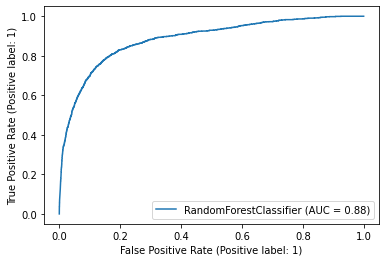

In [84]:
#plot roc curve
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [85]:
#method to evaluate
def evaluate_model(classifier):
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train)))
    
    
    confusion1=confusion_matrix(y_train, classifier.predict(X_train))
    TP1 = confusion1[1,1] # true positive 
    TN1 = confusion1[0,0] # true negatives
    FP1 = confusion1[0,1] # false positives
    FN1 = confusion1[1,0] # false negatives
    # Let's see the sensitivity of model
    recall1=TP1 / float(TP1+FN1)
    # Let us calculate specificity
    precision1=TP1 / float(TP1+FP1)
    print('Train Precision:', precision1)
    print('Train Recall:', recall1)
    print("-"*50)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Precision :",precision_score(y_test,classifier.predict(X_test)))
    print("Test Recall :",recall_score(y_test,classifier.predict(X_test)))
    print("Precision : Probability that a predicted yes is actually yes")
    print("Recall : Probability that an actual yes is correctly predicted")
    
    
    
  

In [86]:
#set params
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,15,20, 25, 50]
}

In [87]:
scores = ['accuracy', 'precision', 'recall']
#cross validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring='accuracy')

In [88]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier w

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=5,
                                              n_estimators=20, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 15, 20, 25, 50]},
             scoring='accuracy', verbose=1)

In [89]:
#find the best score
grid_search.best_score_

0.9375609280561513

In [90]:
#assign the best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=5,
                       min_samples_leaf=5, n_estimators=50, oob_score=True,
                       random_state=100)

In [91]:
#check feature importances
rf_best.feature_importances_

array([0.01362745, 0.01420805, 0.07121735, 0.00879765, 0.00798997,
       0.00839289, 0.00933368, 0.00784031, 0.0094352 , 0.00214966,
       0.00240648, 0.00185926, 0.00217278, 0.00164716, 0.00157676,
       0.00821278, 0.00746999, 0.00785207, 0.00900607, 0.00774825,
       0.00430652, 0.00430681, 0.00371287, 0.00220011, 0.00307644,
       0.00179888, 0.00836786, 0.0009287 , 0.0010618 , 0.00063869,
       0.00653227, 0.00593172, 0.0056658 , 0.        , 0.        ,
       0.        , 0.00480311, 0.00494036, 0.00496242, 0.00139814,
       0.        , 0.        , 0.01604144, 0.0202246 , 0.08842597,
       0.00819436, 0.00715496, 0.00879211, 0.009184  , 0.00895082,
       0.00538391, 0.00623876, 0.00642161, 0.00382361, 0.00428713,
       0.00472784, 0.0068962 , 0.00633184, 0.00550843, 0.00159926,
       0.00180456, 0.0019819 , 0.01988907, 0.0022757 , 0.00153648,
       0.00125384, 0.00222682, 0.00225911, 0.0014392 , 0.00189309,
       0.00224242, 0.00277253, 0.01072629, 0.01018546, 0.02568

In [92]:
evaluate_model(rf_best)

Train Confusion Matrix:
[[18707   354]
 [   24  1431]]
Train Accuracy : 0.9815753558198479
Train Precision: 0.8016806722689076
Train Recall: 0.9835051546391752
--------------------------------------------------
Test Confusion Matrix:
[[7958  203]
 [ 358  274]]
Test Accuracy : 0.9361992494029342
Test Precision : 0.5744234800838575
Test Recall : 0.43354430379746833
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted


In [93]:
#create a dataframe having importance of each columns
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [94]:
#view variables based on their importance
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
44           total_og_mou_8  0.088426
2                    arpu_8  0.071217
80       last_day_rch_amt_8  0.059531
110      day_of_last_rech_8  0.050165
77           max_rech_amt_8  0.046191
86          max_rech_data_8  0.030785
74         total_rech_num_8  0.025680
43           total_og_mou_7  0.020225
94              vol_2g_mb_8  0.019983
62           total_ic_mou_6  0.019889
104                     aon  0.018386
83        total_rech_data_8  0.016495
42           total_og_mou_6  0.016041
97              vol_3g_mb_8  0.015422
1                    arpu_7  0.014208
79       last_day_rch_amt_7  0.013876
0                    arpu_6  0.013627
76           max_rech_amt_7  0.012046
75           max_rech_amt_6  0.010815
72         total_rech_num_6  0.010726
73         total_rech_num_7  0.010185
8              offnet_mou_8  0.009435
6              offnet_mou_6  0.009334
48         loc_ic_t2m_mou_7  0.009184
105              aug_vbc_3g  0.009029
18         loc_og_t2m_mou_6  0.009006
49         loc_ic_t2m_mou_8  0.008951
3               onnet_mou_6  0.008798
47         loc_ic_t2m_mou_6  0.008792
112      day_of_last_rech_7  0.008626
5               onnet_mou_8  0.008393
26             loc_og_mou_7  0.008368
15         loc_og_t2t_mou_6  0.008213
45         loc_ic_t2t_mou_6  0.008194
93              vol_2g_mb_7  0.008106
4               onnet_mou_7  0.007990
17         loc_og_t2t_mou_8  0.007852
7              offnet_mou_7  0.007840
19         loc_og_t2m_mou_7  0.007748
109  avg_rech_data_amt_good  0.007590
78       last_day_rch_amt_6  0.007483
16         loc_og_t2t_mou_7  0.007470
46         loc_ic_t2t_mou_7  0.007155
85          max_rech_data_7  0.007109
56         std_ic_t2m_mou_6  0.006896
91       av_rech_amt_data_7  0.006791
108              sep_vbc_3g  0.006603
30             std_og_mou_6  0.006532
52         loc_ic_t2f_mou_8  0.006422
57         std_ic_t2m_mou_7  0.006332
51         loc_ic_t2f_mou_7  0.006239
92              vol_2g_mb_6  0.006171
90       av_rech_amt_data_6  0.006132
31             std_og_mou_7  0.005932
84          max_rech_data_6  0.005908
111      day_of_last_rech_6  0.005810
100            monthly_2g_8  0.005809
96              vol_3g_mb_7  0.005751
32             std_og_mou_8  0.005666
58         std_ic_t2m_mou_8  0.005508
106              jul_vbc_3g  0.005432
50         loc_ic_t2f_mou_6  0.005384
38             spl_og_mou_8  0.004962
37             spl_og_mou_7  0.004940
36             spl_og_mou_6  0.004803
55         std_ic_t2t_mou_8  0.004728
21         loc_og_t2f_mou_7  0.004307
20         loc_og_t2f_mou_6  0.004307
54         std_ic_t2t_mou_7  0.004287
107              jun_vbc_3g  0.003835
53         std_ic_t2t_mou_6  0.003824
89          count_rech_3g_8  0.003743
95              vol_3g_mb_6  0.003715
22         loc_og_t2f_mou_8  0.003713
99             monthly_2g_7  0.003452
81        total_rech_data_6  0.003321
24         loc_og_t2c_mou_7  0.003076
82        total_rech_data_7  0.002953
103            monthly_3g_8  0.002896
71              ic_others_8  0.002773
10            roam_ic_mou_7  0.002406
63             spl_ic_mou_6  0.002276
67             isd_ic_mou_7  0.002259
70              ic_others_7  0.002242
66             isd_ic_mou_6  0.002227
23         loc_og_t2c_mou_6  0.002200
12            roam_og_mou_6  0.002173
9             roam_ic_mou_6  0.002150
61         std_ic_t2f_mou_8  0.001982
69              ic_others_6  0.001893
11            roam_ic_mou_8  0.001859
60         std_ic_t2f_mou_7  0.001805
25         loc_og_t2c_mou_8  0.001799
88          count_rech_3g_7  0.001722
13            roam_og_mou_7  0.001647
59         std_ic_t2f_mou_6  0.001599
14            roam_og_mou_8  0.001577
64             spl_ic_mou_7  0.001536
68             isd_ic_mou_8  0.001439
39              og_others_6  0.001398
87          count_rech_3g_6  0.001344
98             monthly_2g_6  0.001340
65             spl_ic_mou_8  0.001254
28         std_og_t2f_mou_7  0.001062
102            monthly_3g_7  0

In [95]:
#list top 20 variables
list(imp_df.sort_values(by="Imp", ascending=False)['Varname'][0:20].values)

['total_og_mou_8',
 'arpu_8',
 'last_day_rch_amt_8',
 'day_of_last_rech_8',
 'max_rech_amt_8',
 'max_rech_data_8',
 'total_rech_num_8',
 'total_og_mou_7',
 'vol_2g_mb_8',
 'total_ic_mou_6',
 'aon',
 'total_rech_data_8',
 'total_og_mou_6',
 'vol_3g_mb_8',
 'arpu_7',
 'last_day_rch_amt_7',
 'arpu_6',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'total_rech_num_6']

Using Random forest,with a max depth of 20 we were able to get high accuracy in both train and test cases. The top 20 variables are listed below:

total_og_mou_8',
 'arpu_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'day_of_last_rech_8',
 'total_rech_num_8',
 'total_og_mou_7',
 'total_ic_mou_6',
 'arpu_7',
 'arpu_6',
 'aon',
 'total_og_mou_6',
 'last_day_rch_amt_7',
 'total_rech_num_6',
 'max_rech_data_8',
 'max_rech_amt_7',
 'total_rech_data_8',
 'total_rech_num_7',
 'vol_2g_mb_8',
 'onnet_mou_8'

However, the case study is to identify if a customer is about to churn or not in the last month. So instead of focusing of accuracy, we need to focus on identifying the number of churns correctly. Also we'd also not want to predict non churn customers as churn as they might lead to loss for the organisation.

So we need to build model by considering other metrics like precision and recall also.

### Hyperparameter tuning based on Recall

In [96]:

#cross validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring='recall')

In [97]:
## %%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably mea

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=5,
                                              n_estimators=20, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 15, 20, 25, 50]},
             scoring='recall', verbose=1)

In [98]:
#find the best score
grid_search.best_score_

0.725113901250265

In [99]:
#assign the best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=5,
                       min_samples_leaf=200, n_estimators=15, oob_score=True,
                       random_state=100)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


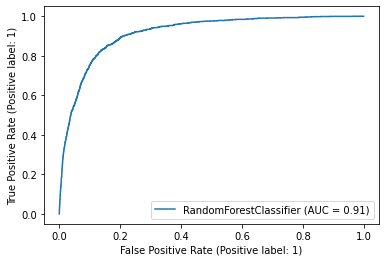

In [100]:
#roc curve for best estimator
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [101]:
#check feature importances
rf_best.feature_importances_

array([5.27537979e-03, 7.29416291e-03, 1.28529003e-01, 1.82097237e-03,
       8.19218045e-04, 8.84894373e-04, 2.44566856e-03, 1.95467339e-03,
       7.13223652e-04, 1.71636046e-04, 3.99018759e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.46265165e-04, 8.60841888e-04,
       2.64361934e-03, 2.15003880e-03, 1.60659120e-03, 1.70367796e-04,
       8.16657592e-04, 1.77305725e-03, 3.89154327e-04, 7.13567179e-04,
       0.00000000e+00, 0.00000000e+00, 1.17637599e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.41656127e-03, 3.04845923e-03,
       2.22750846e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.31220034e-05, 1.01212475e-03, 7.91072689e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.81667365e-02, 1.68755356e-02,
       1.13451134e-01, 1.41899072e-03, 2.64653751e-03, 1.85519757e-03,
       1.64032856e-03, 3.64317889e-03, 1.94161716e-03, 2.97632075e-03,
       1.43913547e-03, 4.46204303e-04, 1.58461643e-04, 2.00187016e-03,
      

In [102]:
evaluate_model(rf_best)

Train Confusion Matrix:
[[16831  2230]
 [  307  1148]]
Train Accuracy : 0.8763404172353285
Train Precision: 0.339846062759029
Train Recall: 0.7890034364261168
--------------------------------------------------
Test Confusion Matrix:
[[7233  928]
 [ 187  445]]
Test Accuracy : 0.8731945866029797
Test Precision : 0.3241077931536781
Test Recall : 0.7041139240506329
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted


In [103]:
#create a dataframe having importance of each columns
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [104]:
#view variables based on their importance
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
77           max_rech_amt_8  0.168423
2                    arpu_8  0.128529
44           total_og_mou_8  0.113451
110      day_of_last_rech_8  0.094338
80       last_day_rch_amt_8  0.066697
86          max_rech_data_8  0.066147
97              vol_3g_mb_8  0.030286
74         total_rech_num_8  0.026688
83        total_rech_data_8  0.023971
42           total_og_mou_6  0.018167
43           total_og_mou_7  0.016876
105              aug_vbc_3g  0.015109
104                     aon  0.015090
94              vol_2g_mb_8  0.014817
62           total_ic_mou_6  0.014137
76           max_rech_amt_7  0.012772
79       last_day_rch_amt_7  0.011834
75           max_rech_amt_6  0.011356
103            monthly_3g_8  0.010635
92              vol_2g_mb_6  0.009015
1                    arpu_7  0.007294
85          max_rech_data_7  0.007028
99             monthly_2g_7  0.006348
96              vol_3g_mb_7  0.006104
84          max_rech_data_6  0.006083
0                    arpu_6  0.005275
95              vol_3g_mb_6  0.005075
73         total_rech_num_7  0.003967
72         total_rech_num_6  0.003709
49         loc_ic_t2m_mou_8  0.003643
31             std_og_mou_7  0.003048
51         loc_ic_t2f_mou_7  0.002976
111      day_of_last_rech_6  0.002840
93              vol_2g_mb_7  0.002814
46         loc_ic_t2t_mou_7  0.002647
16         loc_og_t2t_mou_7  0.002644
6              offnet_mou_6  0.002446
89          count_rech_3g_8  0.002333
32             std_og_mou_8  0.002228
17         loc_og_t2t_mou_8  0.002150
98             monthly_2g_6  0.002147
55         std_ic_t2t_mou_8  0.002002
108              sep_vbc_3g  0.001993
7              offnet_mou_7  0.001955
50         loc_ic_t2f_mou_6  0.001942
78       last_day_rch_amt_6  0.001871
47         loc_ic_t2m_mou_6  0.001855
3               onnet_mou_6  0.001821
21         loc_og_t2f_mou_7  0.001773
58         std_ic_t2m_mou_8  0.001686
48         loc_ic_t2m_mou_7  0.001640
18         loc_og_t2m_mou_6  0.001607
100            monthly_2g_8  0.001515
52         loc_ic_t2f_mou_8  0.001439
45         loc_ic_t2t_mou_6  0.001419
107              jun_vbc_3g  0.001418
30             std_og_mou_6  0.001417
56         std_ic_t2m_mou_6  0.001374
112      day_of_last_rech_7  0.001333
26             loc_og_mou_7  0.001176
109  avg_rech_data_amt_good  0.001171
91       av_rech_amt_data_7  0.001017
37             spl_og_mou_7  0.001012
106              jul_vbc_3g  0.000994
82        total_rech_data_7  0.000916
5               onnet_mou_8  0.000885
15         loc_og_t2t_mou_6  0.000861
102            monthly_3g_7  0.000857
90       av_rech_amt_data_6  0.000824
4               onnet_mou_7  0.000819
20         loc_og_t2f_mou_6  0.000817
38             spl_og_mou_8  0.000791
23         loc_og_t2c_mou_6  0.000714
8              offnet_mou_8  0.000713
61         std_ic_t2f_mou_8  0.000708
57         std_ic_t2m_mou_7  0.000478
64             spl_ic_mou_7  0.000462
53         std_ic_t2t_mou_6  0.000446
10            roam_ic_mou_7  0.000399
22         loc_og_t2f_mou_8  0.000389
81        total_rech_data_6  0.000381
14            roam_og_mou_8  0.000346
66             isd_ic_mou_6  0.000342
60         std_ic_t2f_mou_7  0.000319
69              ic_others_6  0.000222
68             isd_ic_mou_8  0.000216
9             roam_ic_mou_6  0.000172
19         loc_og_t2m_mou_7  0.000170
54         std_ic_t2t_mou_7  0.000158
59         std_ic_t2f_mou_6  0.000015
36             spl_og_mou_6  0.000013
65             spl_ic_mou_8  0.000000
67             isd_ic_mou_7  0.000000
11            roam_ic_mou_8  0.000000
12            roam_og_mou_6  0.000000
63             spl_ic_mou_6  0.000000
101            monthly_3g_6  0.000000
13            roam_og_mou_7  0.000000
39              og_others_6  0.000000
40              og_others_7  0.000000
24         loc_og_t2c_mou_7  0.000000
25         loc_og_t2c_mou_8  0.000000
70              ic_others_7  0.000000
71              ic_others_8  0.000000
88          count_rech_3g_7  0

In [105]:
#list top 20 variables
list(imp_df.sort_values(by="Imp", ascending=False)['Varname'][0:20].values)

['max_rech_amt_8',
 'arpu_8',
 'total_og_mou_8',
 'day_of_last_rech_8',
 'last_day_rch_amt_8',
 'max_rech_data_8',
 'vol_3g_mb_8',
 'total_rech_num_8',
 'total_rech_data_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'aug_vbc_3g',
 'aon',
 'vol_2g_mb_8',
 'total_ic_mou_6',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'max_rech_amt_6',
 'monthly_3g_8',
 'vol_2g_mb_6']

The top 20 variable when prioratising recall are 'arpu_8',
 'last_day_rch_amt_8',
 'total_og_mou_8',
 'vol_3g_mb_8',
 'day_of_last_rech_8',
 'max_rech_data_8',
 'aon',
 'max_rech_amt_8',
 'sep_vbc_3g',
 'vol_2g_mb_8',
 'total_rech_num_8',
 'total_rech_data_8',
 'vol_2g_mb_7',
 'max_rech_data_7',
 'total_ic_mou_6',
 'monthly_3g_8',
 'arpu_7',
 'total_og_mou_6',
 'last_day_rch_amt_7',
 'max_rech_amt_7'

In [106]:
#cross validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring='recall')

In [107]:
## %%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitt

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=5,
                                              n_estimators=20, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 15, 20, 25, 50]},
             scoring='recall', verbose=1)

In [108]:
#find the best score
grid_search.best_score_

0.725113901250265

In [109]:
#assign the best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=5,
                       min_samples_leaf=200, n_estimators=15, oob_score=True,
                       random_state=100)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


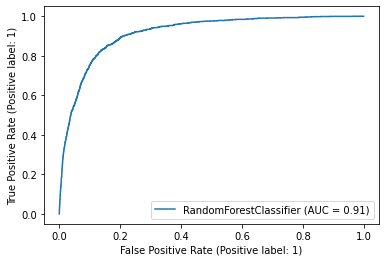

In [110]:
#roc curve for best estimator
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [111]:
#check feature importances
rf_best.feature_importances_

array([5.27537979e-03, 7.29416291e-03, 1.28529003e-01, 1.82097237e-03,
       8.19218045e-04, 8.84894373e-04, 2.44566856e-03, 1.95467339e-03,
       7.13223652e-04, 1.71636046e-04, 3.99018759e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.46265165e-04, 8.60841888e-04,
       2.64361934e-03, 2.15003880e-03, 1.60659120e-03, 1.70367796e-04,
       8.16657592e-04, 1.77305725e-03, 3.89154327e-04, 7.13567179e-04,
       0.00000000e+00, 0.00000000e+00, 1.17637599e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.41656127e-03, 3.04845923e-03,
       2.22750846e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.31220034e-05, 1.01212475e-03, 7.91072689e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.81667365e-02, 1.68755356e-02,
       1.13451134e-01, 1.41899072e-03, 2.64653751e-03, 1.85519757e-03,
       1.64032856e-03, 3.64317889e-03, 1.94161716e-03, 2.97632075e-03,
       1.43913547e-03, 4.46204303e-04, 1.58461643e-04, 2.00187016e-03,
      

In [112]:
evaluate_model(rf_best)

Train Confusion Matrix:
[[16831  2230]
 [  307  1148]]
Train Accuracy : 0.8763404172353285
Train Precision: 0.339846062759029
Train Recall: 0.7890034364261168
--------------------------------------------------
Test Confusion Matrix:
[[7233  928]
 [ 187  445]]
Test Accuracy : 0.8731945866029797
Test Precision : 0.3241077931536781
Test Recall : 0.7041139240506329
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted


In [113]:
#create a dataframe having importance of each columns
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [114]:
#list top 20 variables
print('The top 20 variables when the metrics is recall are : \n',list(imp_df.sort_values(by="Imp", ascending=False)['Varname'][0:20].values))

The top 20 variables when the metrics is recall are : 
 ['max_rech_amt_8', 'arpu_8', 'total_og_mou_8', 'day_of_last_rech_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'vol_3g_mb_8', 'total_rech_num_8', 'total_rech_data_8', 'total_og_mou_6', 'total_og_mou_7', 'aug_vbc_3g', 'aon', 'vol_2g_mb_8', 'total_ic_mou_6', 'max_rech_amt_7', 'last_day_rch_amt_7', 'max_rech_amt_6', 'monthly_3g_8', 'vol_2g_mb_6']


# Model Building using PCA

# PreProcessing for PCA

In [115]:
#scale the data

In [116]:
#scaling object
scaler=StandardScaler()

In [117]:
#fit transform X train
X_train=scaler.fit_transform(X_train)

In [118]:
#transform X test
X_test=scaler.transform(X_test)

### PCA on the data

In [119]:
X_train.shape

(20516, 113)

In [120]:
from sklearn.decomposition import PCA

In [121]:
#pca
pca = PCA(random_state=100)

In [122]:
#fit on train
pca.fit(X_train)

PCA(random_state=100)

In [123]:
#check PCA components
pca.components_

array([[-2.67504640e-02, -2.64736258e-02, -1.03776470e-03, ...,
        -5.99320518e-02, -9.72171564e-02, -7.35523269e-02],
       [-2.48827218e-03, -2.07409189e-03, -3.48186176e-03, ...,
         1.80193241e-03,  3.21993536e-03,  6.21855393e-03],
       [ 2.29690712e-01,  2.46408018e-01,  2.40239799e-01, ...,
        -2.84610401e-02, -3.26543750e-02, -2.96839667e-02],
       ...,
       [ 0.00000000e+00,  5.70874365e-18,  4.36453933e-17, ...,
        -4.41129939e-17, -9.08316869e-17,  5.06203822e-17],
       [ 0.00000000e+00, -4.27530157e-17,  1.00411160e-16, ...,
        -4.12644020e-17, -8.41507166e-17,  4.19949492e-18],
       [-0.00000000e+00,  8.11198435e-17, -5.29111698e-17, ...,
         1.03921516e-17, -1.60230167e-17, -3.03886281e-17]])

In [124]:
#check expense variable ratio
pca.explained_variance_ratio_

array([1.10367942e-01, 9.13135393e-02, 5.73424561e-02, 5.45180208e-02,
       4.20433426e-02, 3.37048417e-02, 2.87994455e-02, 2.81714760e-02,
       2.32464884e-02, 2.17538988e-02, 2.04324666e-02, 1.91792647e-02,
       1.88028629e-02, 1.73926920e-02, 1.68622285e-02, 1.58426614e-02,
       1.55729212e-02, 1.36930913e-02, 1.35071008e-02, 1.17746292e-02,
       1.16959505e-02, 1.14355382e-02, 1.03835632e-02, 1.00702865e-02,
       9.57337046e-03, 9.48061240e-03, 9.04856871e-03, 8.76090094e-03,
       8.54092961e-03, 8.33128701e-03, 8.13614331e-03, 7.92764773e-03,
       7.62978148e-03, 7.53196955e-03, 7.43053905e-03, 7.16856612e-03,
       7.08559329e-03, 6.60643969e-03, 6.41341051e-03, 6.21615361e-03,
       6.12589395e-03, 6.09192741e-03, 5.78300590e-03, 5.71061983e-03,
       5.63440254e-03, 5.57096217e-03, 5.46341195e-03, 5.17814878e-03,
       4.95579991e-03, 4.85711200e-03, 4.63636789e-03, 4.50313393e-03,
       4.41912468e-03, 4.34232526e-03, 4.14795050e-03, 4.08250246e-03,
      

In [125]:
#cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

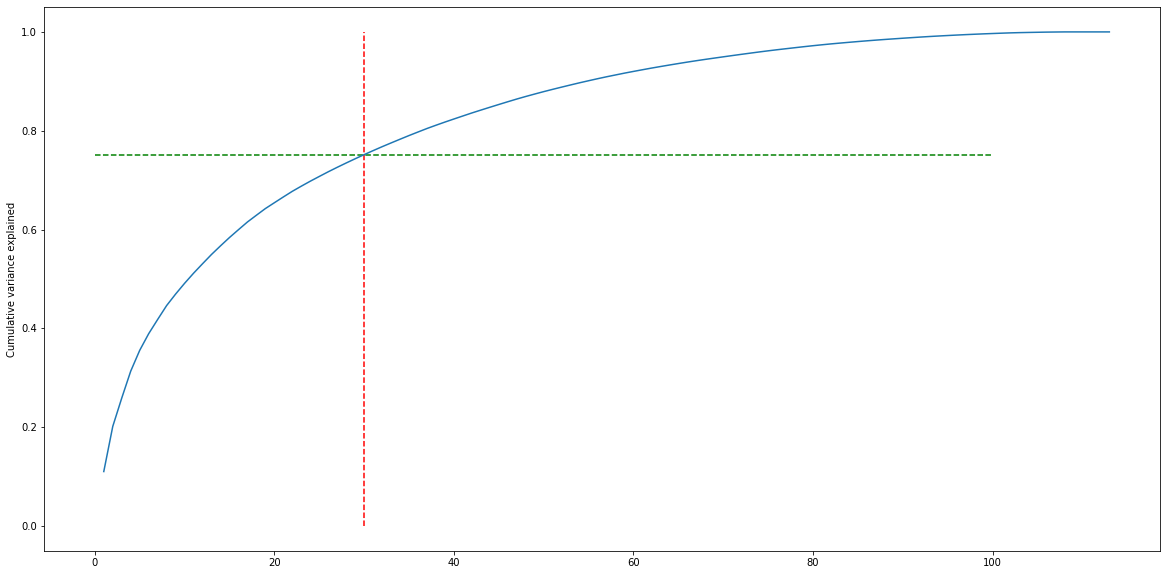

In [126]:
#plot a screeplot
fig = plt.figure(figsize=[20,10])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.75, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

From the above we can see that 75% of the variance can be explained by 30 variables

#### PCA with  30 components

In [127]:
pca_final = IncrementalPCA(n_components=30)

In [128]:
df_train_pca = pca_final.fit_transform(X_train)

In [129]:
df_train_pca.shape

(20516, 30)

In [130]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [131]:
corrmat.shape

(30, 30)

<AxesSubplot:>

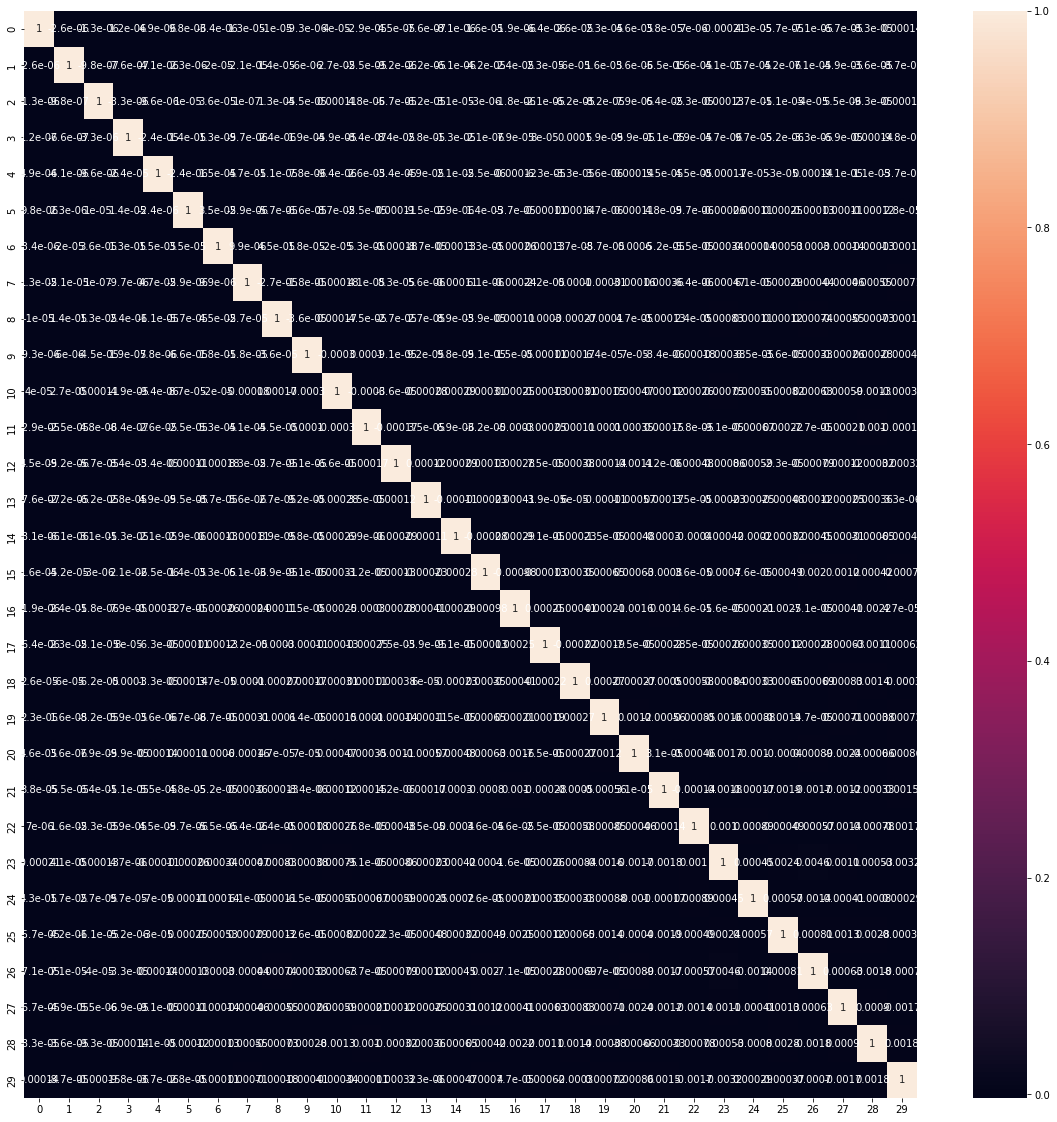

In [132]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

In [133]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8793, 30)

### Applying logistic regression on the data on our Principal components


In [134]:
learner_pca = LogisticRegression()

In [135]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [136]:
y_train_pred=model_pca.predict_proba(df_train_pca)

In [137]:
y_train_pred_final = pd.DataFrame({'mobile_number':mobile_number_train,'Churn_Original':y_train.values, 'Churn_Prob':y_train_pred[:,1]})

In [138]:
y_train_pred_final.head()

mobile_number  Churn_Original  Churn_Prob
29900     7002357003               0    0.035579
19577     7000167590               0    0.035472
20237     7001695273               0    0.003518
14293     7000495025               0    0.039218
28243     7000843980               0    0.007096

In [139]:
from sklearn.metrics import precision_recall_curve

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn_Original, y_train_pred_final.Churn_Prob)

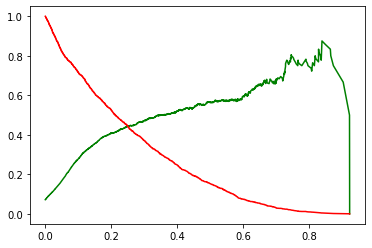

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.20 else 0)

In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn_Original, y_train_pred_final.final_predicted)

0.9121173718073698

In [144]:
# Let's check the overall precision.
metrics.precision_score(y_train_pred_final.Churn_Original, y_train_pred_final.final_predicted)

0.4072494669509595

In [145]:
# Let's check the overall recall.
metrics.recall_score(y_train_pred_final.Churn_Original, y_train_pred_final.final_predicted)

0.525085910652921

In [146]:
y_test_pred = model_pca.predict_proba(df_test_pca)

In [147]:
y_test_pred_final = pd.DataFrame({'mobile_number':mobile_number_test,'Churn_Original':y_test.values, 'Churn_Prob':y_test_pred[:,1]})

In [148]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.20 else 0)

In [149]:
y_test_pred_final.head(20)

mobile_number  Churn_Original  Churn_Prob  final_predicted
20429     7001433850               0    0.001276                0
5556      7002068236               1    0.193164                0
15277     7002328540               0    0.005448                0
995       7001921502               0    0.005436                0
3434      7000873671               0    0.008118                0
22306     7000928291               0    0.059622                0
8811      7000018120               0    0.018795                0
26003     7000130506               0    0.052035                0
16004     7000119381               0    0.028052                0
29928     7000712514               0    0.157895                0
17279     7000370718               0    0.031754                0
5839      7001598273               0    0.008450                0
28159     7000695520               0    0.029501                0
24776     7001663550               0    0.009289                0
20476     7001840226               0    0.004344                0
7405      7001375455               0    0.141993                0
11578     7001861361               0    0.002011                0
28598     7001378892               0    0.033151                0
8030      7002201637               0    0.005780                0
16767     7000216926               0    0.006105                0

In [150]:
# area under curve
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred_final.final_predicted))

'0.72'

In [151]:
print("Train Accuracy :", accuracy_score(y_train, model_pca.predict(df_train_pca)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, model_pca.predict(df_train_pca)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, model_pca.predict(df_test_pca)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, model_pca.predict(df_test_pca)))

Train Accuracy : 0.9315168648859427
Train Confusion Matrix:
[[18889   172]
 [ 1233   222]]
--------------------------------------------------
Test Accuracy : 0.9284658250881382
Test Confusion Matrix:
[[8084   77]
 [ 552   80]]


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Churn_Original, y_test_pred_final.final_predicted)

0.9125440691459116

In [153]:
# Let's check the overall precision.
metrics.precision_score(y_test_pred_final.Churn_Original, y_test_pred_final.final_predicted)

0.40974967061923584

In [154]:
# Let's check the overall recall.
metrics.recall_score(y_test_pred_final.Churn_Original, y_test_pred_final.final_predicted)

0.4920886075949367

#### As  we can see, using PCA also, we are able to get a high accuracy using Logistic Regression